In [8]:
import import_ipynb
from Spaceship_Titanic_P0 import *

# Exploratory Data Analysis

In [9]:
# Save to df
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [10]:
# Shape and preview
print('Train set shape: ', train.shape)
print('Test set shape: ', test.shape)

Train set shape:  (8693, 14)
Test set shape:  (4277, 13)


In [11]:
# Train preview
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Feature descriptions:

- PassengerId: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.


- HomePlanet: The planet the passenger departed from, typically their planet of permanent residence.


- CryoSleep: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.


- Cabin: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.


- Destination: The planet the passenger will be debarking to.


- Age: The age of the passenger.


- VIP: Whether the passenger has paid for special VIP service during the voyage.


- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.


- Name - The first and last names of the passenger.


- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Missing values

In [12]:
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [13]:
print('TEST SET MISSING VALUES:')
print(test.isna().sum())

TEST SET MISSING VALUES:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


**Almost every feature has missing values.**

## Duplicates

In [14]:
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')

print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)
Duplicates in test set: 0, (0.0%)


**No Duplicates**

## Cardinality of features
- 6 continuous features
- 4 categorical features (excluding the target) 
- 3 descriptive/qualitative features.

In [16]:
#Count of distinct values
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

## Data types

In [19]:
# Data Types of the train dataset
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**We will need to transform the data to be numeric (int64 or float64) so that we can train machine learning models.**

## Target distribution

Text(0.5, 1.0, 'Target distribution')

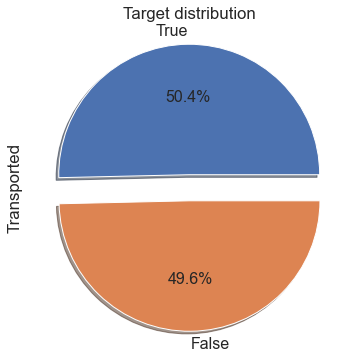

In [22]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], 
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             textprops={'fontsize':16}).set_title("Target distribution")

**The target is highly balanced**

## Continuous features

Text(0.5, 0, 'Age (years)')

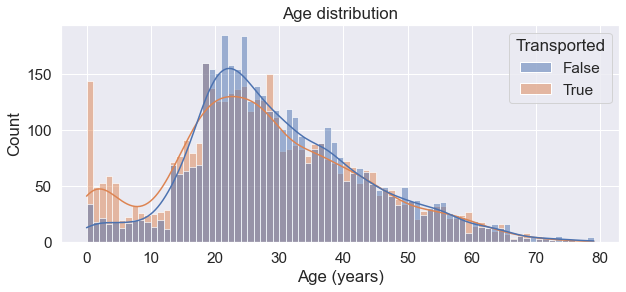

In [20]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

### Notes:
- 0-18 year olds were more likely to be transported than not.
- 18-25 year olds were less likely to be transported than not.
- Over 25 year olds were about equally likely to be transported than not.

### Insight:
- Create a new feature that indicates whether the passanger is a child, adolescent or adult.

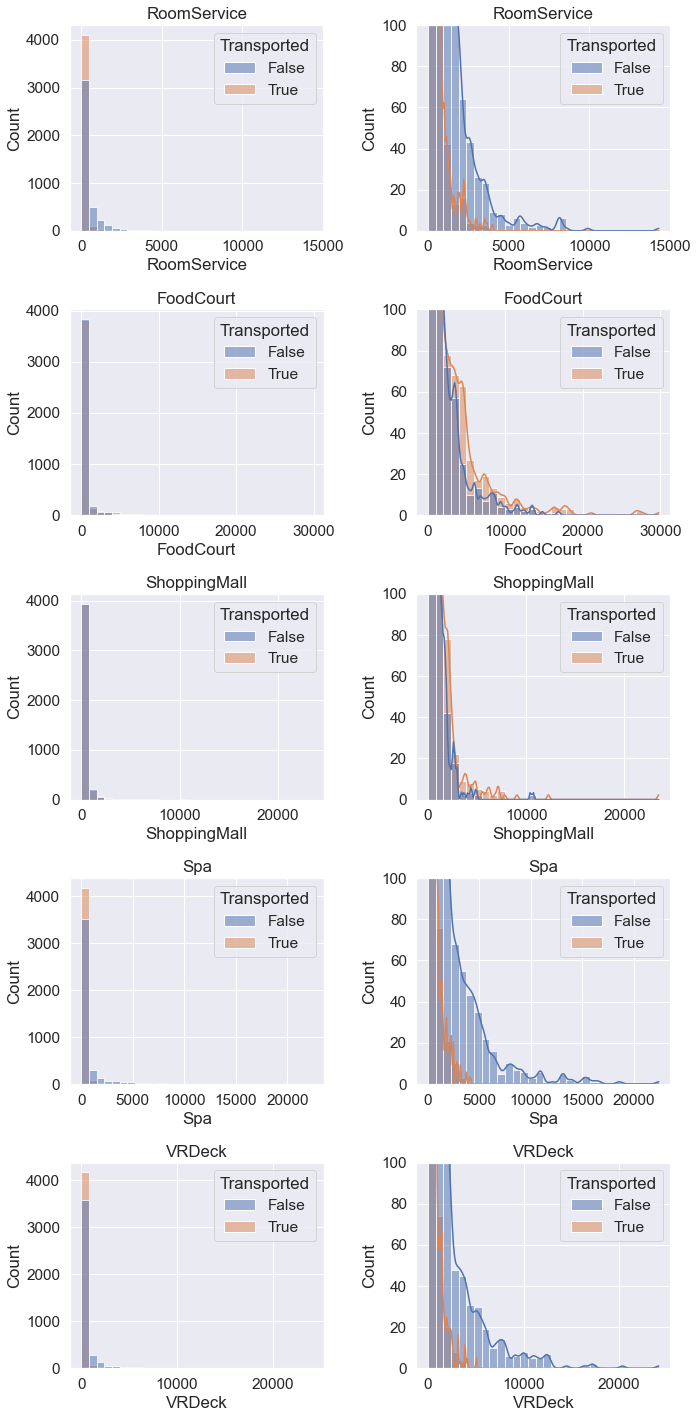

In [21]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))

for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
    
fig.tight_layout()  # Improves appearance a bit
plt.show()

### Notes:
- Most people don't spend any money (as we can see on the left).
- The distribution of spending decays exponentially (as we can see on the right).
- There are a small number of outliers.
- People who were transported tended to spend less.
- RoomService, Spa and VRDeck have different distributions to FoodCourt and ShoppingMall - we can think of this as luxury vs essential amenities.

### Insight:
- Create a new feature that tracks the total expenditure across all 5 amenities.
- Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).
- Take the log transform to reduce skew.

## Categorical features

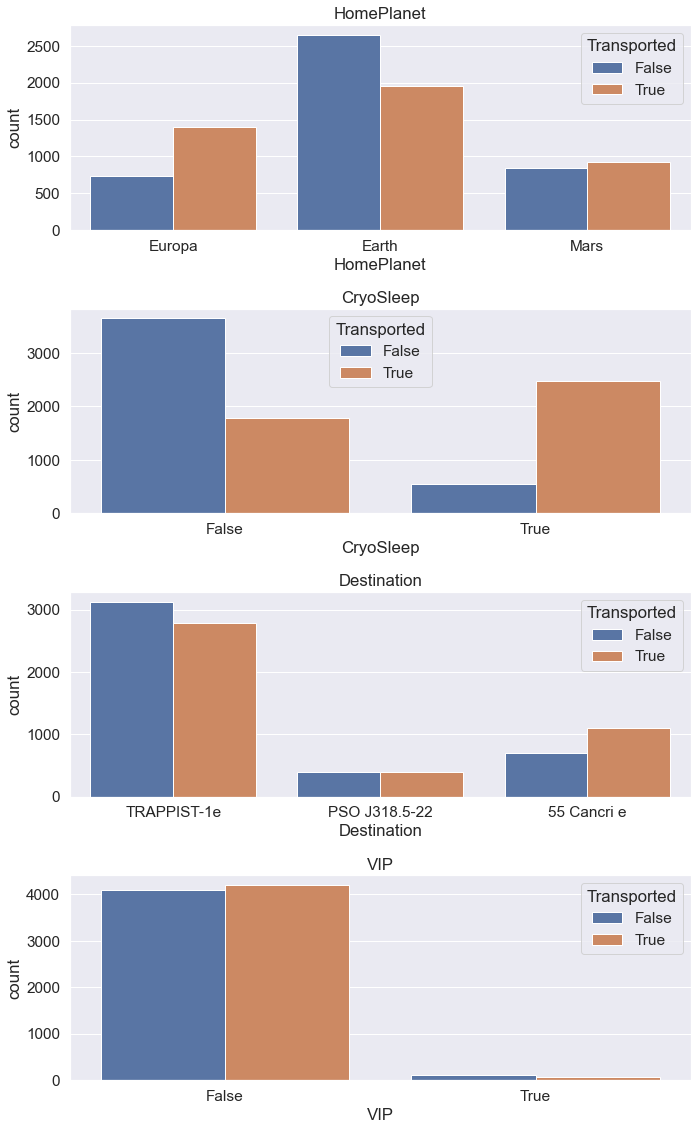

In [22]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
    
    
fig.tight_layout()  # Improves appearance a bit
plt.show()

### Notes:
- VIP does not appear to be a useful feature; the target split is more or less equal.
- CryoSleep appears the be a very useful feature in contrast.

### Insights:
- We might consider dropping the VIP column to prevent overfitting.

## Qualitative features
- We can't plot this data (yet). We need to transform it into more useful features.

In [23]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
train[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


### Notes:
- PassengerId takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
- Cabin takes the form deck/num/side, where side can be either P for Port or S for Starboard.

### Insights:
- We can extract the group and group size from the PassengerId feature.
- We can extract the deck, number and side from the cabin feature.
- We could extract the surname from the name feature to identify families.

# [Go_to_Part_2](http://127.0.0.1:8888/notebooks/Repositorios%20Github/Repos_Proyectos/Titanic2/Spaceship_Titanic_P2.ipynb)